# DIABETES PREDICTION (Classification Problem)

### Analyzing Diagnostic Factors Using Optimized Decision Trees

In [79]:
#Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from pickle import dump
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**STEP 1: PROBLEM STATEMENT & DATA COLLECTION**

***1.1 PROBLEM STATEMENT***

**Goal** -  predict based on diagnostic measures whether or not a patient has diabetes.

***1.2 DATA COLLECTION***

In [80]:
pd.options.display.max_columns=None
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
df.to_csv("../data/raw/diabetes_data.csv", index=False)

**STEP 2: EXPLORATION & DATA CLEANING**

****2.1.1 Understanding the features****

To answer the above questions and develop a predictive model, we collected data on the following variables:

* `Pregnancies` - Number of pregnancies of the patient (numeric)
* `Glucose` - Plasma glucose concentration after 2 hours of an oral glucose tolerance test (numeric)
* `BloodPressure` - Diastolic blood pressure (measured in mm Hg) (numeric)
* `SkinThickness` - Triceps skinfold thickness (measured in mm) (numeric)
* `Insulin` - 2-hour serum insulin (measured in mu U/ml) (numeric)
* `BMI` - Body mass index (numeric)
* `DiabetesPedigreeFunction` - Diabetes pedigree function (numeric)
* `Age` - Age of the patient (numeric)
* `Outcome` - Class variable (0 or 1), where 0 is diabetes negative and 1 is diabetes positive (numeric)

In [82]:
# Obtaining Dataset dimensions:
print("Dataset dimensions:")
print(df.shape)

Dataset dimensions:
(768, 9)


In [83]:
# Obtaining Dataset informations:
print("Dataset informations:")
print(df.info())

Dataset informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [84]:
# Analyze the types of information we have
print("Data types present in the dataset:", df.dtypes.unique())

# Identify numerical and categorical variables
numerical_vars = df.select_dtypes(include=['float', 'int']).columns
categorical_vars = df.select_dtypes(include=['O']).columns

# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

Data types present in the dataset: [dtype('int64') dtype('float64')]
Number of categorical variables: 0
Categorical variables: []


Number of numerical variables: 9
Numerical variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


#### Statements

* This DataFame is composed by 768 rows and 9 columns (variables).
* The data has:
    * 9 numerical variables

**2.2 DATA CLEANING**

***2.2.1 ELIMINATE DUPLICATES***

In this step, I will eliminate duplicates, which is essential to ensure data integrity. Duplicates can distort analyses, introduce bias, and affect model accuracy. This step helps keep the dataset clean by representing each input uniquely and reliably. 

In [85]:
# Display initial row count
initial_row_count = df.shape[0]

# Check and remove duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {df.shape[0]}.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


#### Statement

* there are no duplicates ​​in this dataframe.

***2.2.2 ELIMINATE IRRELEVANT INFORMATION***

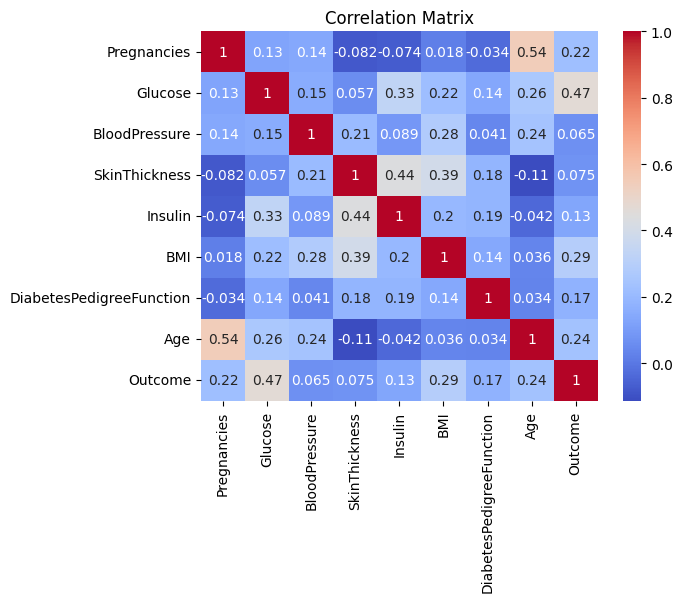

In [86]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


#### Statement

In this initial phase, no variables will be eliminated from the dataset. Despite some variables showing low correlation with the target (Outcome), the dataset contains only 9 features, and all of them may hold potential value in combination with others. By retaining all variables, we aim to allow the model to learn and assess their relevance without prematurely discarding potentially important information. This approach ensures a comprehensive analysis and avoids losing insights that could improve the model's performance.

**STEP 3: ANALYSIS OF UNIVARIATE VARIABLES**

In [87]:
num = ['int64', 'float64']
cat = ['O']

df_numerical = df.select_dtypes(num)
df_categorical = df.select_dtypes(cat)

Since the dataset does not contain any categorical variables, the analysis will focus on performing a univariate analysis of the numerical variables. This approach will help to understand the distribution, range, and potential outliers for each feature, providing insights into their individual behavior and preparing the data for the next stages of modeling.

**3.2 ANALYSIS OF NUMERICAL VARIABLES**

In [88]:
df_numerical.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


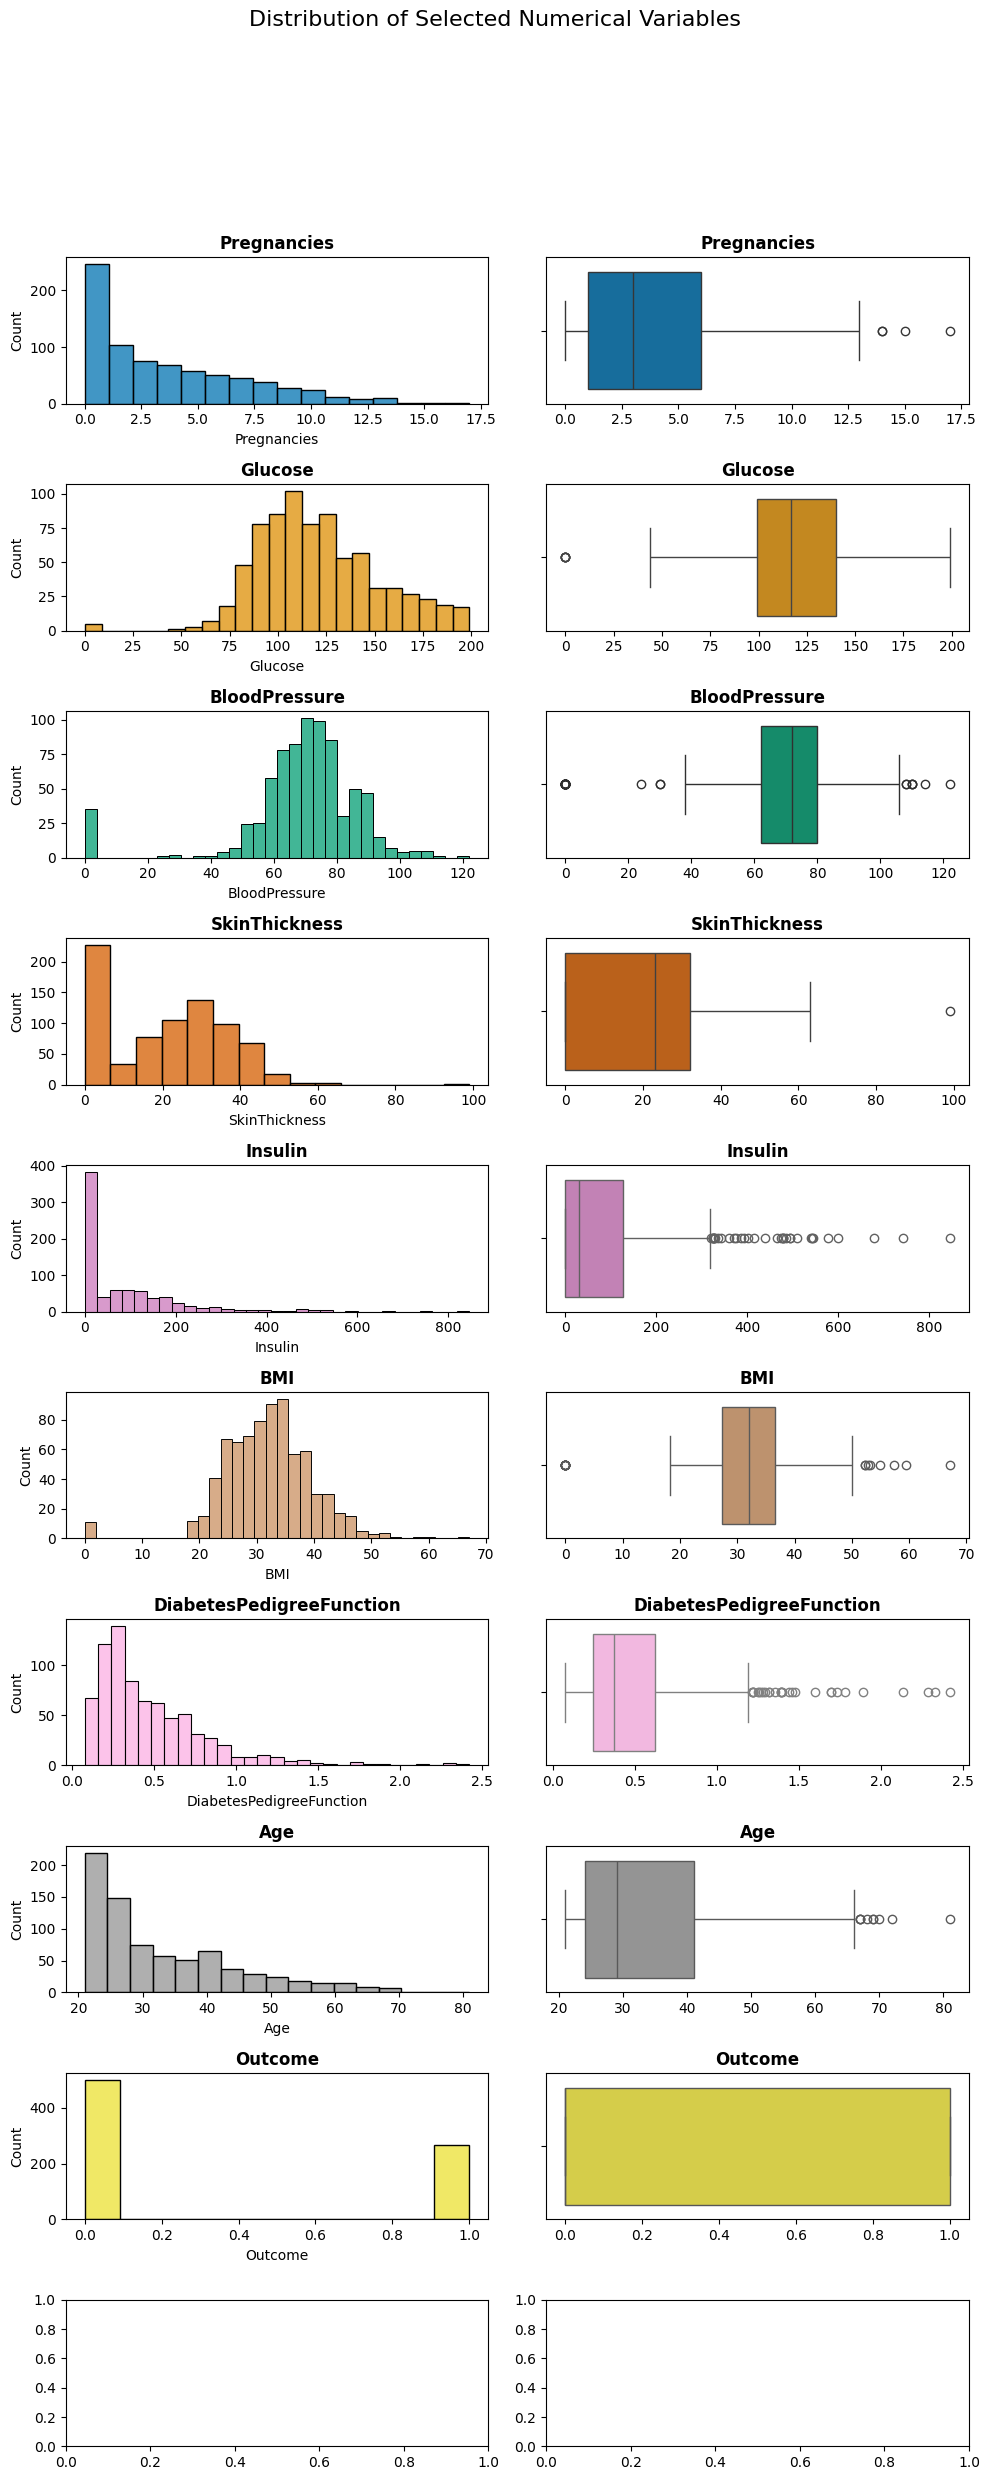

In [89]:
def plot_numerical_variables(df_numerical, hue=None): 
    """
    Plots histograms and boxplots for all numeric variables in `df_numerical`
    using a 2-column layout with a fixed color palette for visual consistency.

    Parameters:
    - df_numerical: DataFrame containing only the numerical columns to analyze.
    - hue: Column name for hue (optional). If provided, it must exist in `df_numerical`.
    """
  
    numerical_columns = df_numerical.columns.tolist()

  
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  

   
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 5))
    plt.suptitle('Distribution of Selected Numerical Variables', fontsize=16, y=1.02)

   
    axes = axes.flatten()

   
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=df_numerical, x=col, hue=hue if hue in df_numerical.columns else None, color=color)
        axes[i * 2].set_title(col, fontweight='bold')  
        
        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=df_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col, fontweight='bold')  
        axes[i * 2 + 1].set(xlabel=None)  

  
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_numerical_variables(df_numerical)

#### Statements

* `Pregnancies`, `SkinThickness`, `Insulin`, and `DiabetesPedigreeFunction` exhibit skewed distributions with notable outliers.
* `Glucose` and `BMI` demonstrate a more symmetric distribution, although outliers are still present.
* `BloodPressur` and `Age` show patterns of central tendency but also contain data points that deviate significantly.
* The **target variable** `Outcome` is imbalanced, with a higher proportion of negative cases (0) compared to positive cases (1).

**STEP 4: ANALYSIS OF MULTIVARIATE VARIABLES**

Since the dataset does not contain any categorical variables, the step of encoding categorical values is not required in this analysis. All features are already numerical, eliminating the need for transformations such as label encoding or one-hot encoding. This simplifies the preprocessing pipeline, allowing the focus to remain on the analysis and preparation of the numerical data.

**4.1 NUMERICAL-NUMERICAL ANALYSIS**

In this section, we explore the relationships between the target variable, `Outcome`, and the numerical predictor variables. The goal is to identify correlations and patterns that may indicate which diagnostic measures are most relevant for determining whether or not a patient has diabetes. This analysis serves as a foundation for feature selection and understanding the data's behavior."

In [90]:
list(df_numerical)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

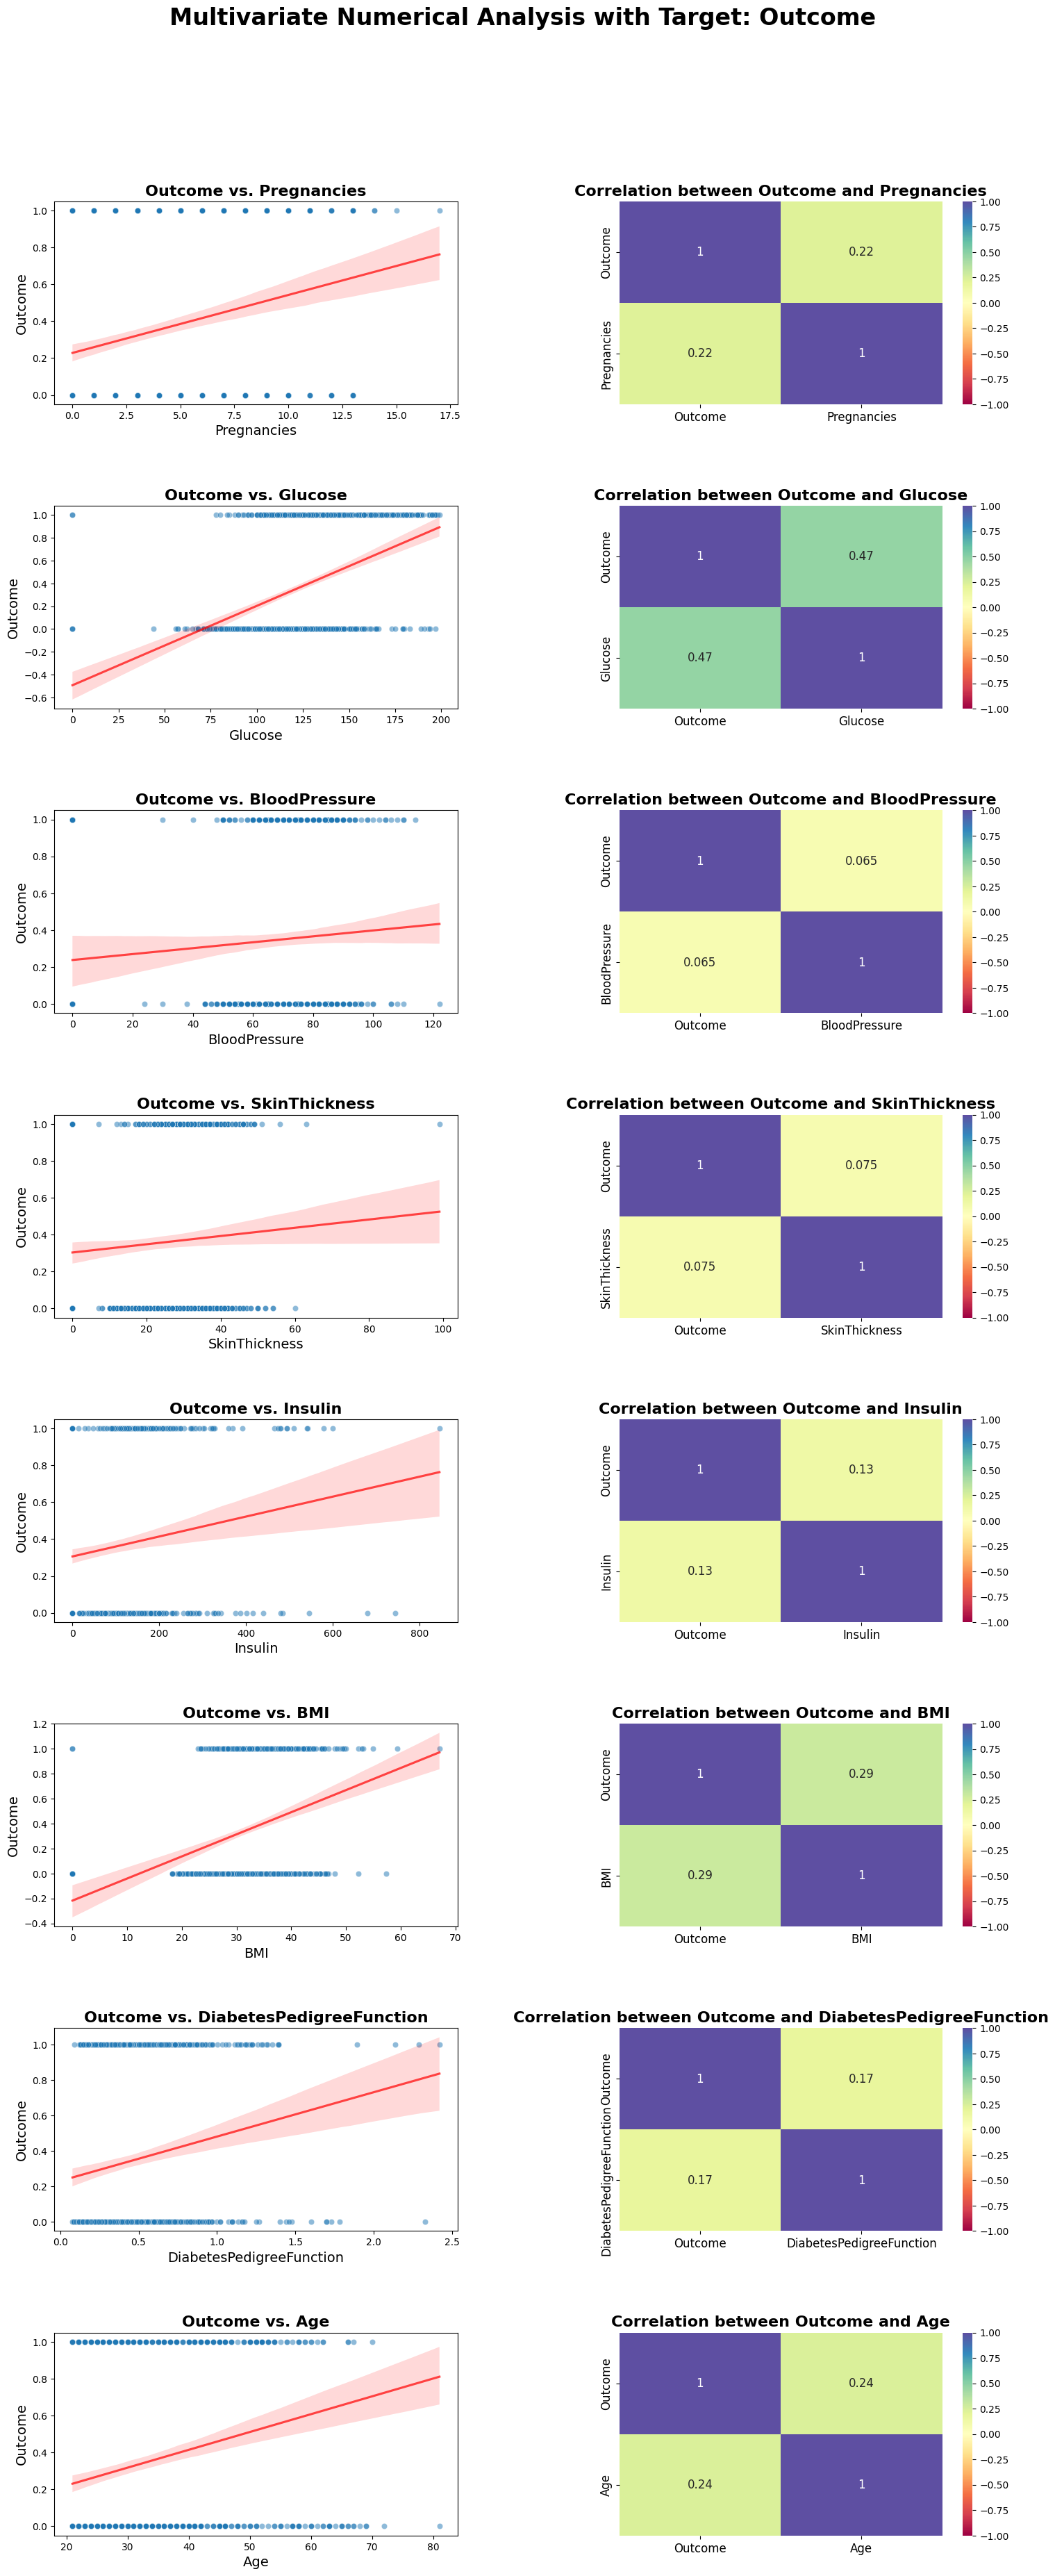

In [91]:
def multivariate_numeric_analysis(df, target_variable, numerical_columns):
    """
    Generates scatter plots and correlation matrices between the target variable and other numerical variables.

    Parameters:
    - df: DataFrame containing the data.
    - target_variable: String representing the name of the target variable (must be in numerical format).
    - numerical_columns: List of strings with the names of the numerical columns for analysis.
    """
   
    num_vars = len(numerical_columns)
    fig, axes = plt.subplots(num_vars, 2, figsize=(18, num_vars * 5))
    fig.suptitle(f'Multivariate Numerical Analysis with Target: {target_variable}', fontsize=24, fontweight='bold', y=1.02)
    
  
    for i, col in enumerate(numerical_columns):
        # Scatterplot with regression line
        sns.scatterplot(ax=axes[i, 0], data=df, x=col, y=target_variable, alpha=0.5)
        sns.regplot(ax=axes[i, 0], data=df, x=col, y=target_variable, scatter=False, color='red', line_kws={"alpha":0.7})
        axes[i, 0].set_title(f'{target_variable} vs. {col}', fontsize=16, fontweight='bold')
        axes[i, 0].set_xlabel(col, fontsize=14)
        axes[i, 0].set_ylabel(target_variable, fontsize=14)
        
        # Correlation matrix between the target variable and the numerical variable
        corr_data = df[[target_variable, col]].corr()
        sns.heatmap(ax=axes[i, 1], data=corr_data, annot=True, cmap='Spectral', cbar=True, vmin=-1, vmax=1, annot_kws={"size": 12})
        axes[i, 1].set_title(f'Correlation between {target_variable} and {col}', fontsize=16, fontweight='bold')
        axes[i, 1].tick_params(axis='both', which='major', labelsize=12)


    plt.subplots_adjust(top=0.95, hspace=0.5, wspace=0.4)
    plt.show()

numerical_columns = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']
target_variable = 'Outcome'
multivariate_numeric_analysis(df, target_variable, numerical_columns)

#### Statements

**Pregnancies:** A positive correlation is observed with Outcome (correlation = 0.22). As the number of pregnancies increases, there is a slight trend toward a higher likelihood of diabetes.

**Glucose:** This feature has the strongest correlation with Outcome (correlation = 0.47). The scatter plot demonstrates a clear upward trend, indicating that higher glucose levels are associated with a higher probability of diabetes.

**BloodPressure:** There is a weak positive correlation with Outcome (correlation = 0.065). No significant trend is evident in the scatter plot.

**SkinThickness:** A weak positive correlation is observed (correlation = 0.075). While there is some upward trend, the relationship is not pronounced.

**Insulin:** Exhibits a weak correlation with Outcome (correlation = 0.13). Higher insulin levels show a slight increase in diabetes probability.

**BMI (Body Mass Index):** This feature has a moderate positive correlation (correlation = 0.29). The scatter plot shows a trend indicating that higher BMI values are associated with an increased likelihood of diabetes.

**DiabetesPedigreeFunction:** Shows a weak correlation with Outcome (correlation = 0.17). The scatter plot suggests a mild trend where higher values in this function are associated with diabetes.

**Age:** Displays a moderate positive correlation with Outcome (correlation = 0.24). Older individuals appear to have a slightly higher probability of diabetes.

The analysis confirms that Glucose, BMI, and Age exhibit the most notable relationships with Outcome, making them potentially important predictors for determining diabetes risk. 

**4.2 CORRELATION MATRIX: (complete)**

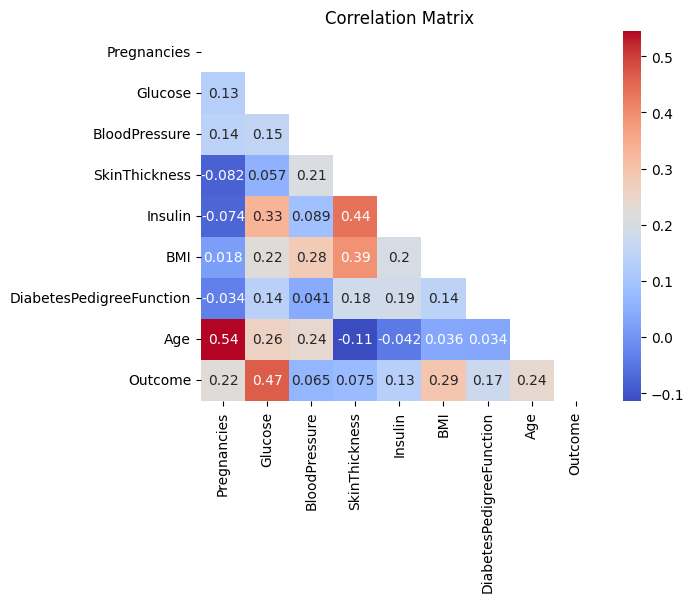

In [92]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=np.triu(df.corr()))
plt.title("Correlation Matrix")
plt.show()

#### Statements

* `Outcome` shows the strongest positive correlation with `Glucose` (0.47), followed by `BMI` (0.29), `Age` (0.24), and `Pregnancies` (0.22). These features are likely to be significant predictors for diabetes.
Other variables, such as `BloodPressure` (0.065) and `SkinThickness` (0.075), exhibit very weak correlations with Outcome.

* The matrix provides critical insights for feature selection, emphasizing the importance of variables such as `Glucose`, `BMI`, `Age`, and `Pregnancies` in predicting diabetes. Variables with weak correlations to `Outcome` might have less individual impact but could still contribute in combination with others.

**STEP 5. FEATURE ENGINEERING**

**5.1 OUTLIER ANALYSIS**

In [93]:
df_stats = df.describe()
df_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [94]:
outlier_variables = list(df_numerical)

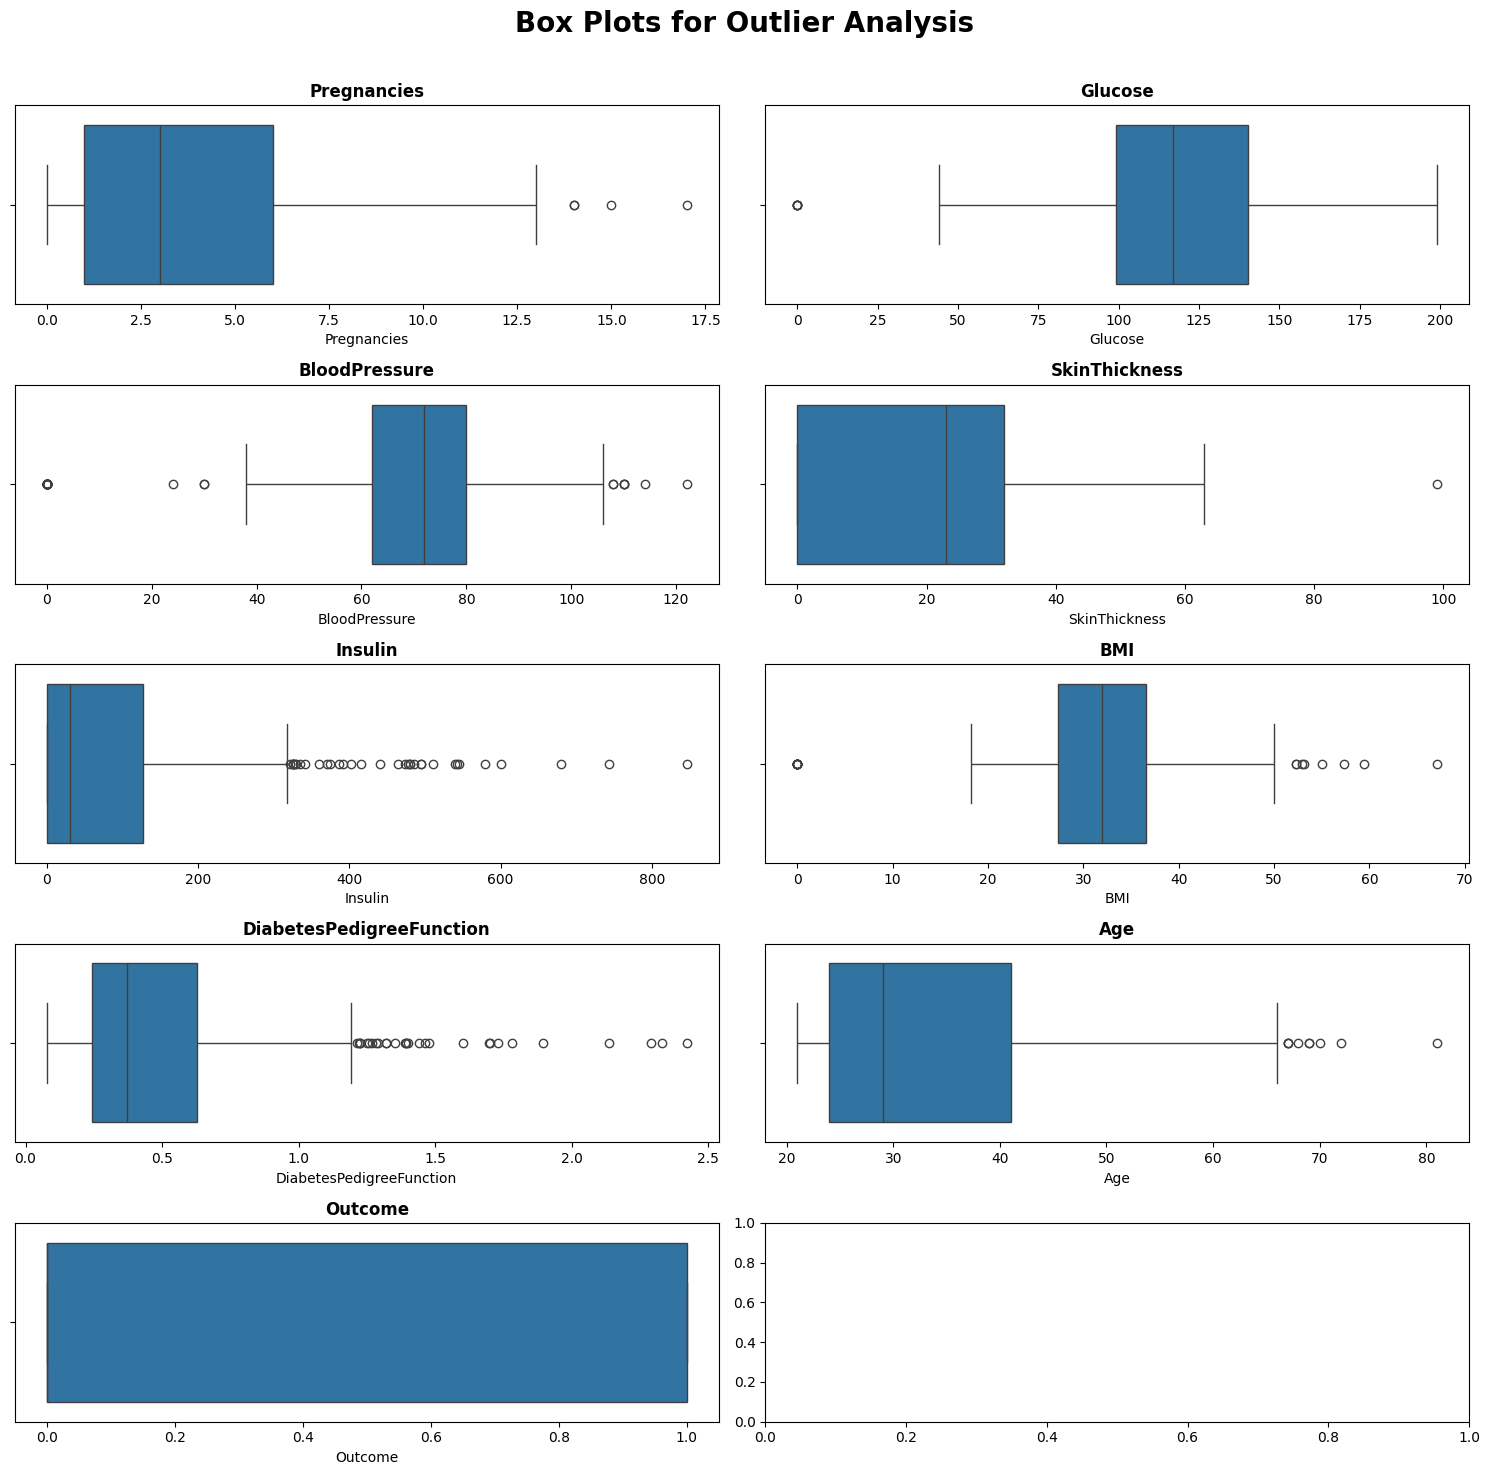

In [95]:
num_vars = len(outlier_variables)
num_rows = math.ceil(num_vars / 2)  

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 3))
fig.suptitle('Box Plots for Outlier Analysis', fontsize=20, fontweight='bold')


for i, var in enumerate(outlier_variables):
    row, col = divmod(i, 2)  
    sns.boxplot(ax=axes[row, col], data=df, x=var)
    axes[row, col].set_title(var, fontweight='bold')


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


#### Statements

Outlier limits will be calculated for variables presenting significant outliers, such as `BloodPressure` and `DiabetesPedigreeFunction`. These limits will be used to create a new dataframe without outliers (df_without_outliers). Both dataframes—with outliers and without outliers—will be used to train the model, enabling a performance comparison to determine whether handling outliers improves predictive accuracy and generalization."

In [96]:
df_with_outliers = df.copy()

In [97]:
df_without_outliers = df.copy()

In [98]:

def remove_outliers(x, feature_name, allow_neg=True):
 
    safe_feature_name = feature_name.replace("%", "percent").replace("/", "_").replace(" ", "_")

    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr * 1.5)
    lower_lim = q1 - (iqr * 1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda val: upper_lim if val > upper_lim else (lower_lim if val < lower_lim else val))


    filename = f'../data/interim/outliers_lims_{safe_feature_name}.json'
    with open(filename, 'w') as f:
        json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, f)

    return x

In [99]:
outlier_variables = [
    'BloodPressure',
    'DiabetesPedigreeFunction'
]

In [100]:
for feature in outlier_variables:
    df_without_outliers[feature] = remove_outliers(df_without_outliers[feature], feature_name=feature, allow_neg=False)

In [101]:
df_with_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
df_without_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,1.200,33,1


**5.2 MISSING VALUES**

In [103]:
df_without_outliers.isna().sum()[df_with_outliers.isna().sum()>0]

Series([], dtype: int64)

In [104]:
df_with_outliers.isna().sum()[df_with_outliers.isna().sum()>0]

Series([], dtype: int64)

#### Statements


* There are no missing values for treatment.

**5.3 SPLIT TRAIN/TEST OF 2 DATAFRAMES: WITH AND WITHOUT OUTLIERS**

In [105]:
def split(target, df, test_size=0.2, random_state=123):
    """
    Splits a DataFrame into training and testing sets.

    Parameters:
    - target: str, the name of the target column to be predicted
    - df: DataFrame, the complete DataFrame to split
    - test_size: float, proportion of the data to allocate to the test set (default is 0.2)
    - random_state: int, sets the seed for reproducibility (default is 123)

    Returns:
    - X_train, X_test: DataFrames containing the training and testing features
    - y_train, y_test: Series containing the training and testing target values
    """
    
    X = df.drop(columns=target)  
    y = df[target]               

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

In [106]:
# Split original dataframe 
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Outcome', df_with_outliers)
X_train_without_outliers, X_test_without_outliers, _, _ = split('Outcome', df_without_outliers)

X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [107]:
# View train and test data for verification
X_train_with_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,3,115,66,39,140,38.1,0.150,28
313,3,113,50,10,85,29.5,0.626,25
195,5,158,84,41,210,39.4,0.395,29
570,3,78,70,0,0,32.5,0.270,39
226,0,101,76,0,0,35.7,0.198,26


In [108]:
X_train_without_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,3,115,66.0,39,140,38.1,0.150,28
313,3,113,50.0,10,85,29.5,0.626,25
195,5,158,84.0,41,210,39.4,0.395,29
570,3,78,70.0,0,0,32.5,0.270,39
226,0,101,76.0,0,0,35.7,0.198,26


In [109]:
y_test.head()

236    1
395    0
36     0
210    0
483    0
Name: Outcome, dtype: int64

**5.4 NORMALIZATION**

In [110]:
def normalize_and_save(X_train, X_test, filename):
    """
    Normalizes the data using StandardScaler and saves the scaler for future use.

    Parameters:
    - X_train: DataFrame with the training data
    - X_test: DataFrame with the testing data
    - filename: string, the name of the file to save the scaler

    Returns:
    - X_train_norm: DataFrame with the normalized training data
    - X_test_norm: DataFrame with the normalized testing data
    """

    # Initialize and adjusts the scaler
    scaler = StandardScaler()
    scaler.fit(X_train)  

    # Apply normalization to training and testing data
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'../data/processed/{filename}.sav')

    return X_train_norm, X_test_norm

# Application of the function to normalize data with and without outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = normalize_and_save(
    X_train_with_outliers, X_test_with_outliers, 'normalized_with_outliers'
)

X_train_without_outliers_norm, X_test_without_outliers_norm = normalize_and_save(
    X_train_without_outliers, X_test_without_outliers, 'normalized_without_outliers'
)

**5.5 min-MAX SCALING**

In [111]:
def minmax_and_save(X_train, X_test, filename):
    """
    Applies Min-Max Scaling to the data and saves the scaler for future use.

    Parameters:
    - X_train: DataFrame with the training data
    - X_test: DataFrame with the testing data
    - filename: string, the name of the file to save the scaler

    Returns:
    - X_train_minmax: DataFrame with the scaled training data
    - X_test_minmax: DataFrame with the scaled testing data
    """

    scaler = MinMaxScaler()
    scaler.fit(X_train) 

    # Apply Min-Max Scaling to training and testing data
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'../data/processed/{filename}.sav')

    return X_train_minmax, X_test_minmax

# Applying the function to scale data with and without outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax_and_save(
    X_train_with_outliers, X_test_with_outliers, 'minmax_with_outliers'
)

X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax_and_save(
    X_train_without_outliers, X_test_without_outliers, 'minmax_without_outliers'
)

**STEP 6. FEATURE SELECTION**

In [112]:
def kselection_and_save(X_train, X_test, y_train, k, filename):
    """
    Applies feature selection using SelectKBest and saves the model for future use.

    Parameters:
    - X_train: DataFrame with training data
    - X_test: DataFrame with testing data
    - y_train: Series with target training data
    - k: Number of features to select
    - filename: String, the name of the file to save the selection model

    Returns:
    - X_train_sel: DataFrame with selected features from training data
    - X_test_sel: DataFrame with selected features from testing data
    """
    
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    selected_columns = X_train.columns[selection_model.get_support()]

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns, index=X_train.index)
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns, index=X_test.index)

  
    joblib.dump(selection_model, f'../data/processed/{filename}.sav')

    return X_train_sel, X_test_sel

# Application of the function to select features with and without outliers
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection_and_save(
    X_train_with_outliers, X_test_with_outliers, y_train, 6, 'selection_model_with_outliers'
)

X_train_without_outliers_sel, X_test_without_outliers_sel = kselection_and_save(
    X_train_without_outliers, X_test_without_outliers, y_train, 6, 'selection_model_without_outliers'
)

**6.1 APPLYING THE FILTER TO THE NORMALIZED AND minMAX SCALED DATAFRAMES**

In [113]:
# Applying the filter to normalized and Min-Max Scaling datasets

# Normalized data
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_without_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_without_outliers_sel.columns]

# Scaled data with Min-Max
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

**6.2 SAVING THE CSV FILES**

In [114]:
dfs_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

dfs_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

## MACHINE LEARNING

##### DECISION TREE

##### **WHICH IS THE BEST DATASET?**

In [115]:
train, test = [], []

for name, df in dfs_train.items():
    train.append(df)
for name, df in dfs_test.items():
    test.append(df)

In [116]:
results_DecisionTree = []

# Loop through the training/test sets
for name, X_train in dfs_train.items():
    X_test = dfs_test[name.replace('train', 'test')]


    DecisionTree_model = DecisionTreeClassifier(random_state=28)
    DecisionTree_model.fit(X_train, y_train)
    y_pred = DecisionTree_model.predict(X_test)

    # Armazenar os resultados
    results_DecisionTree.append(
        {
            "Dataset": name,
            "Accuracy Score": round(accuracy_score(y_test, y_pred), 4),
            "Precision": round(precision_score(y_test, y_pred), 4),
            "Recall": round(recall_score(y_test, y_pred), 4),
            "F1-Score": round(f1_score(y_test, y_pred), 4),
            "Model": DecisionTree_model 
        }
    )


best_result = max(results_DecisionTree, key=lambda x: x["Accuracy Score"])

# Exibir apenas o melhor resultado
print("Best Decision Tree Result:")
print(f"Dataset: {best_result['Dataset']}")
print(f"Accuracy: {best_result['Accuracy Score']:.4f}")
print(f"Precision: {best_result['Precision']:.4f}")
print(f"Recall: {best_result['Recall']:.4f}")
print(f"F1-Score: {best_result['F1-Score']:.4f}")
print(f"Model: {best_result['Model']}")

Best Decision Tree Result:
Dataset: X_train_with_outliers_sel
Accuracy: 0.7468
Precision: 0.6557
Recall: 0.6897
F1-Score: 0.6723
Model: DecisionTreeClassifier(random_state=28)


**Statement** - The best dataframe using this model is X_train_with_outliers_sel, with an accuracy score of 0.74 (74,68%).

 ## **RANDOM FOREST MODEL**

In [117]:
results_rf = []

# Loop through the training/test sets
for name, X_train in dfs_train.items():
    X_test = dfs_test[name.replace('train', 'test')]


    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    
    results_DecisionTree.append(
        {
            "Dataset": name,
            "Accuracy Score": round(accuracy_score(y_test, y_pred), 4)
        }
    )


best_result = max(results_DecisionTree, key=lambda x: x["Accuracy Score"])

print("Best Decision Tree Result:")
print(f"Dataset: {best_result['Dataset']}")
print(f"Accuracy: {best_result['Accuracy Score']:.4f}")

Best Decision Tree Result:
Dataset: X_train_without_outliers_sel
Accuracy: 0.7987


**Statement** - The best dataframe using this model is X_train_without_outliers_sel, with an accuracy score of 0.7987 (79,87%).

 ## **OPTIMIZING RANDOM FOREST**

In [118]:
# Lists of hyperparameters to test
n_estimators_list = [50, 100, 200]
max_depth_list = [10, 20, 30]

results_optimized = []

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        # Initialize the model with hyperparameters
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        
        # Train the model
        rf_model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = rf_model.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        results_optimized.append((n_estimators, max_depth, accuracy))
        print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, Accuracy: {accuracy}")


n_estimators: 50, max_depth: 10, Accuracy: 0.7727272727272727
n_estimators: 50, max_depth: 20, Accuracy: 0.7792207792207793
n_estimators: 50, max_depth: 30, Accuracy: 0.7792207792207793
n_estimators: 100, max_depth: 10, Accuracy: 0.7792207792207793
n_estimators: 100, max_depth: 20, Accuracy: 0.7987012987012987
n_estimators: 100, max_depth: 30, Accuracy: 0.7987012987012987
n_estimators: 200, max_depth: 10, Accuracy: 0.7857142857142857
n_estimators: 200, max_depth: 20, Accuracy: 0.7792207792207793
n_estimators: 200, max_depth: 30, Accuracy: 0.7792207792207793


In [119]:
best_result = max(results_optimized, key=lambda x: x[2])


print(f"\nBest Result:")
print(f"n_estimators: {best_result[0]}, max_depth: {best_result[1]}, Accuracy: {best_result[2]:.4f}")



Best Result:
n_estimators: 100, max_depth: 20, Accuracy: 0.7987


#### Statement

The best dataframe using this model is X_train_without_outliers_sel, with an accuracy score of 0.74 (79,87%).

#### **Impact of Hyperparameters on Random Forest**

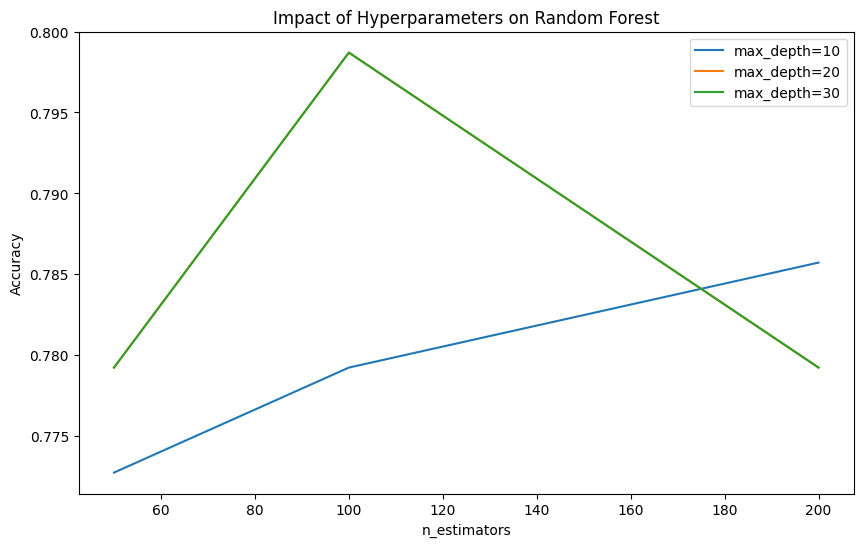

In [120]:
results_df = pd.DataFrame(results_optimized, columns=["n_estimators", "max_depth", "accuracy"])

# Visualizar impacto de n_estimators e max_depth
plt.figure(figsize=(10, 6))
for max_depth in max_depth_list:
    subset = results_df[results_df["max_depth"] == max_depth]
    plt.plot(subset["n_estimators"], subset["accuracy"], label=f"max_depth={max_depth}")

plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Impact of Hyperparameters on Random Forest")
plt.legend()
plt.show()


#### Statements
The best accuracy was obtained with:
* n_estimators=100
* max_depth=20

In [121]:
# Train the final model with the best hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)  # Exemplo de melhores valores
best_rf_model.fit(X_train, y_train)

# Saving Random Forest model
dump(best_rf_model, open("random_forest_diabetes_model_42.sav", "wb"))


### CONFUSION MATRIX

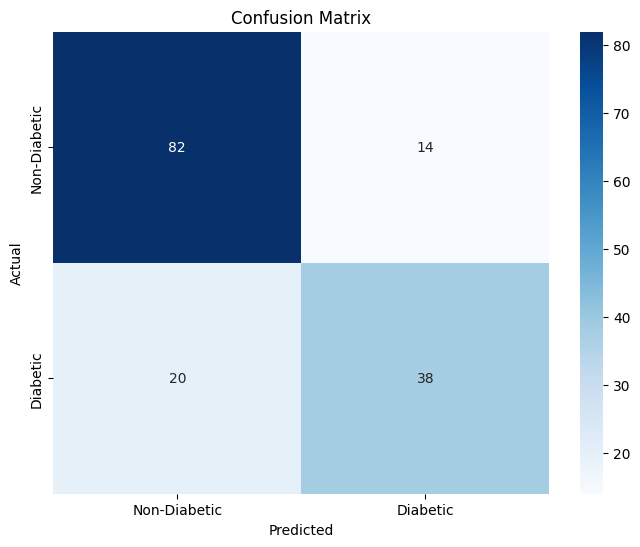

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Statements

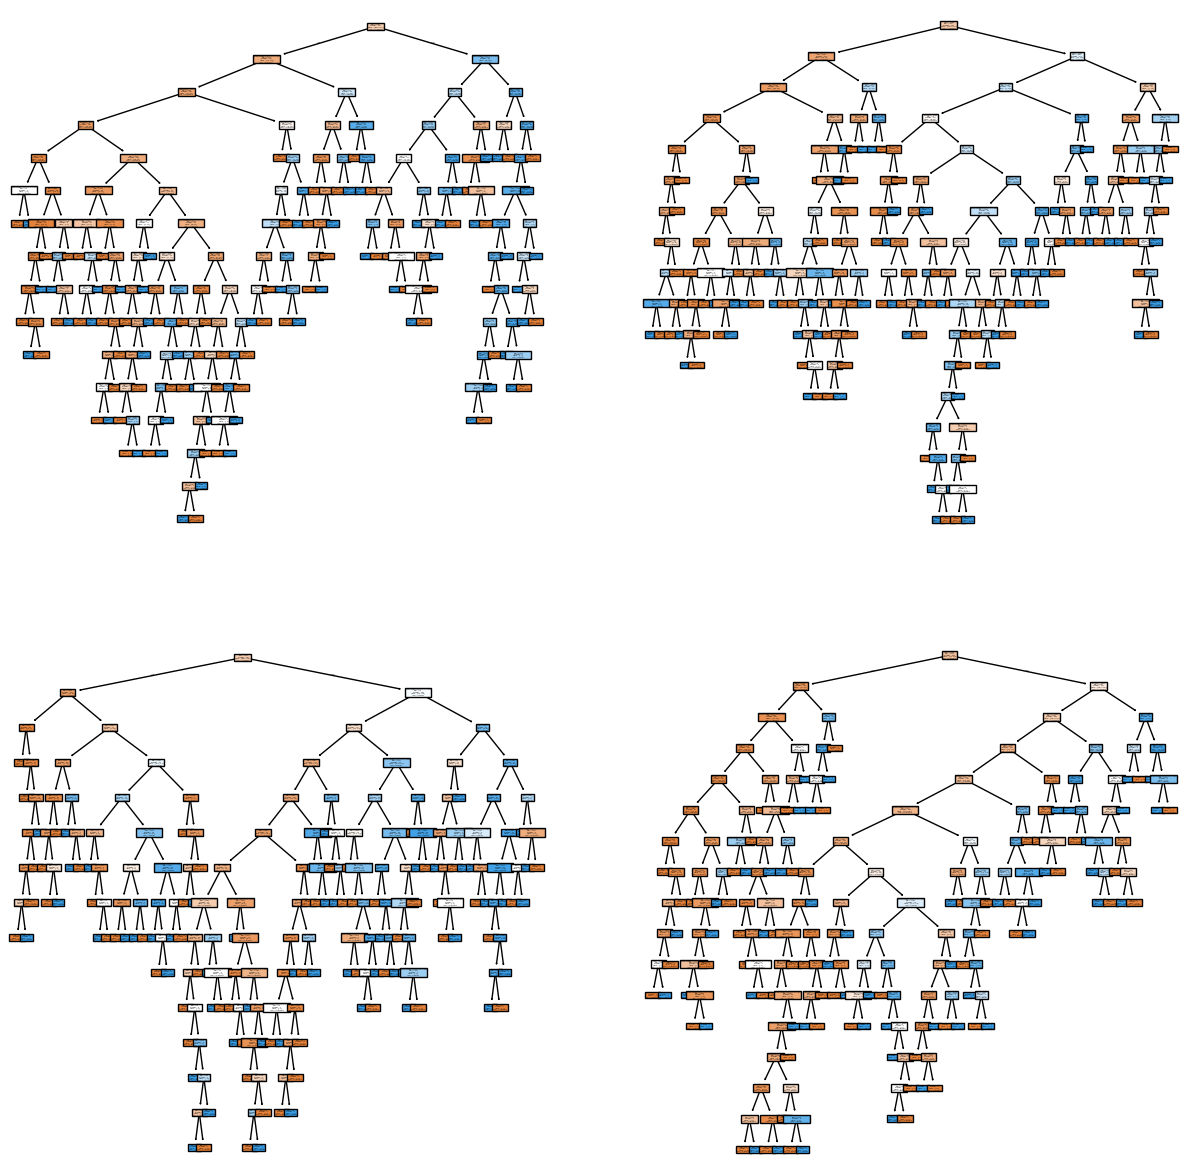

In [123]:
fig, axis = plt.subplots(2, 2, figsize=(15, 15))

for i, ax in enumerate(axis.flat):
    tree.plot_tree(
        best_rf_model.estimators_[i],
        ax=ax,
        feature_names=X_train_without_outliers_sel.columns,
        class_names=["No Diabetes", "Diabetes"],
        filled=True
    )

plt.show()


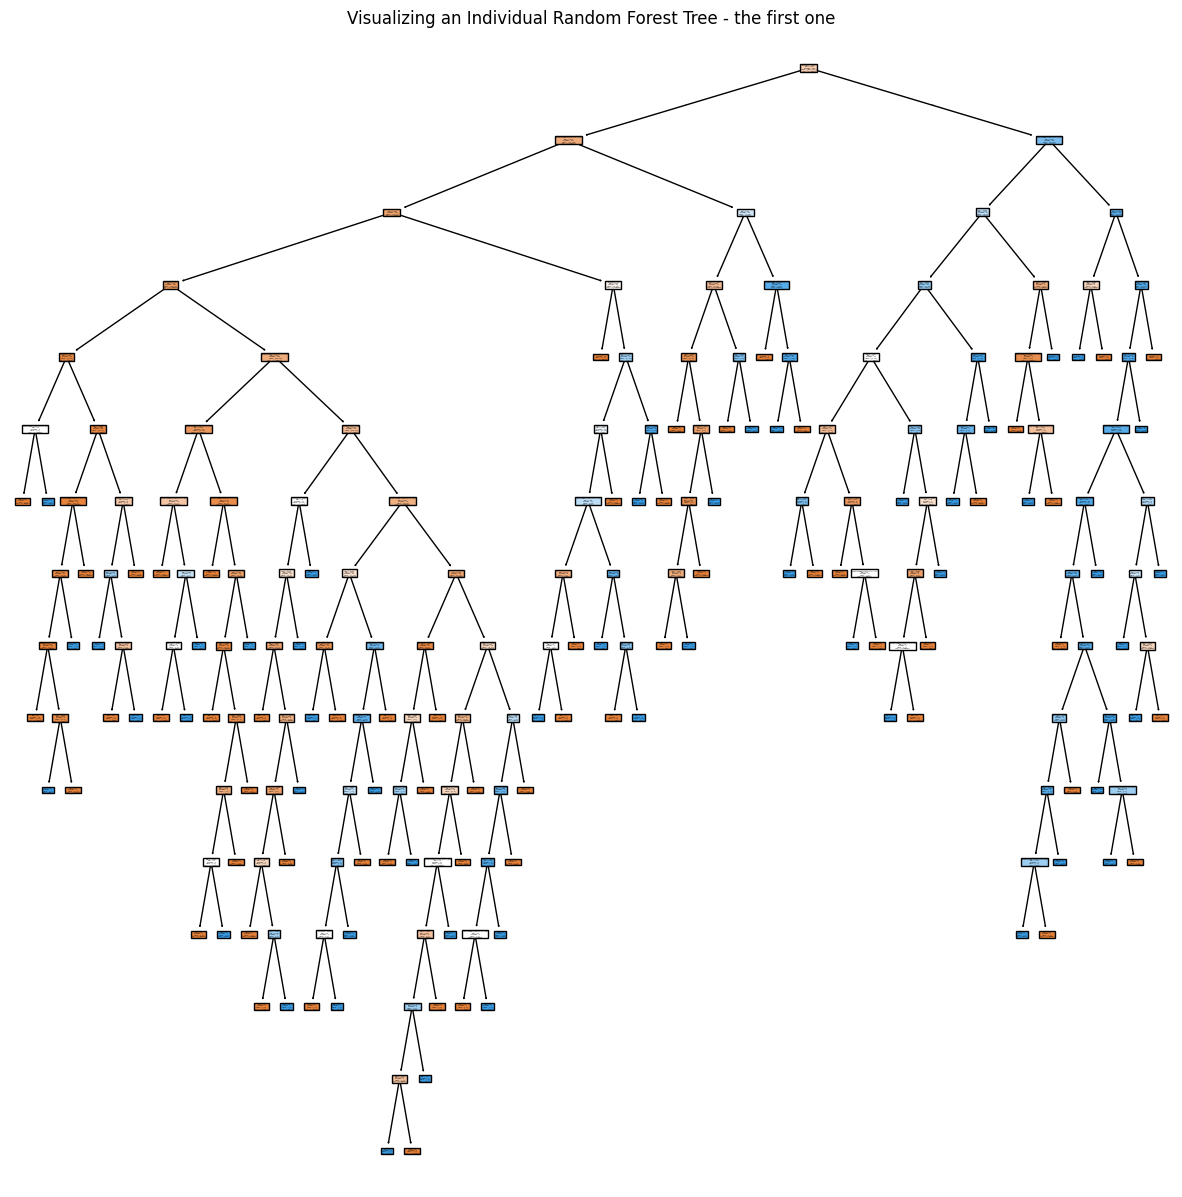

In [124]:
tree_to_plot = best_rf_model.estimators_[0]


plt.figure(figsize=(15, 15))
tree.plot_tree(
    tree_to_plot,
    feature_names=X_train_without_outliers_sel.columns,  
    class_names=["Non-Diabetic", "Diabetic"], 
    filled=True
)
plt.title("Visualizing an Individual Random Forest Tree - the first one")
plt.show()
